In [1]:
# 訓練データとテストデータの画像を読み込む
# （サイズは縦横224pxにリサイズする）
import tensorflow as tf

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dog_cat_photos/train",
    image_size=(224, 224),
    label_mode="binary",
    batch_size=32,
    shuffle=True
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dog_cat_photos/test",
    image_size=(224, 224),
    label_mode="binary",
    batch_size=32,
    shuffle=False
)

Found 300 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [2]:
# データの詳細を表示する
list(train_dataset.as_numpy_iterator())[0]

(array([[[[212.       , 204.       , 201.       ],
          [212.       , 204.       , 201.       ],
          [212.       , 204.       , 201.       ],
          ...,
          [213.       , 208.       , 204.       ],
          [213.       , 208.       , 204.       ],
          [213.       , 208.       , 204.       ]],
 
         [[212.00447  , 204.00447  , 201.00447  ],
          [212.00447  , 204.00447  , 201.00447  ],
          [212.00447  , 204.00447  , 201.00447  ],
          ...,
          [213.00075  , 208.00075  , 204.00075  ],
          [213.       , 208.       , 204.       ],
          [213.       , 208.       , 204.       ]],
 
         [[212.6741   , 204.6741   , 201.6741   ],
          [212.6741   , 204.6741   , 201.6741   ],
          [212.6741   , 204.6741   , 201.6741   ],
          ...,
          [213.1136   , 208.1136   , 204.1136   ],
          [213.00075  , 208.00075  , 204.00075  ],
          [213.       , 208.       , 204.       ]],
 
         ...,
 
         [[2

In [3]:
# 分類名（no／yes）をリストとして格納する
class_names = train_dataset.class_names
class_names

['cat', 'dog']

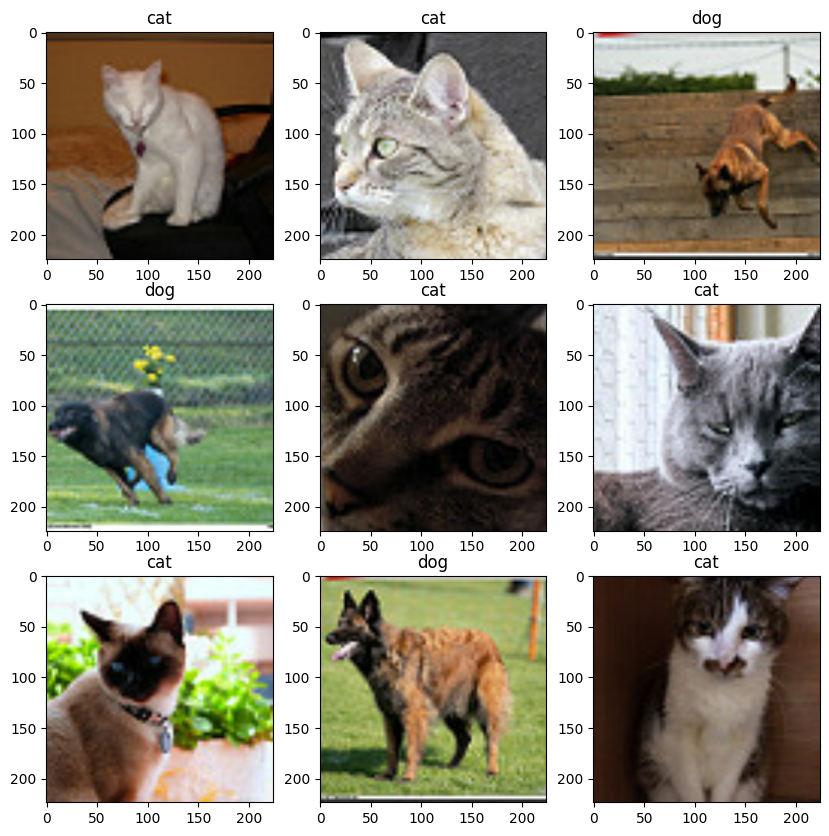

In [4]:
# 訓練データの一部を表示して確認
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().astype("uint8")[0]])

In [9]:
# 画像の水増しをする関数の定義
def flip_left_right(image, label):   # 左右反転
    image = tf.image.flip_left_right(image)
    return image, label

def flip_up_down(image, label):      # 上下反転
    image = tf.image.flip_up_down(image)
    return image, label

def rot90(image, label):             # 反時計回りに90度回転
    image = tf.image.rot90(image)
    return image, label

def rot180(image, label):            # 反時計回りに180度回転
    image = tf.image.rot90(image, k=2)
    return image, label

def rot270(image, label):            # 反時計回りに270度回転
    image = tf.image.rot90(image, k=3)
    return image, label

In [10]:
# 画像の水増し処理の実行
train_dataset_lr     = train_dataset.map(flip_left_right)
train_dataset_ud     = train_dataset.map(flip_up_down)
train_dataset_rot90  = train_dataset.map(rot90)
train_dataset_rot180 = train_dataset.map(rot180)
train_dataset_rot270 = train_dataset.map(rot270)

In [11]:
# 水増ししたデータを訓練データに追加する
train_dataset = train_dataset.concatenate(train_dataset_lr)
train_dataset = train_dataset.concatenate(train_dataset_ud)
train_dataset = train_dataset.concatenate(train_dataset_rot90)
train_dataset = train_dataset.concatenate(train_dataset_rot180)
train_dataset = train_dataset.concatenate(train_dataset_rot270)

In [12]:
# データをシャッフルする
train_dataset = train_dataset.shuffle(32)

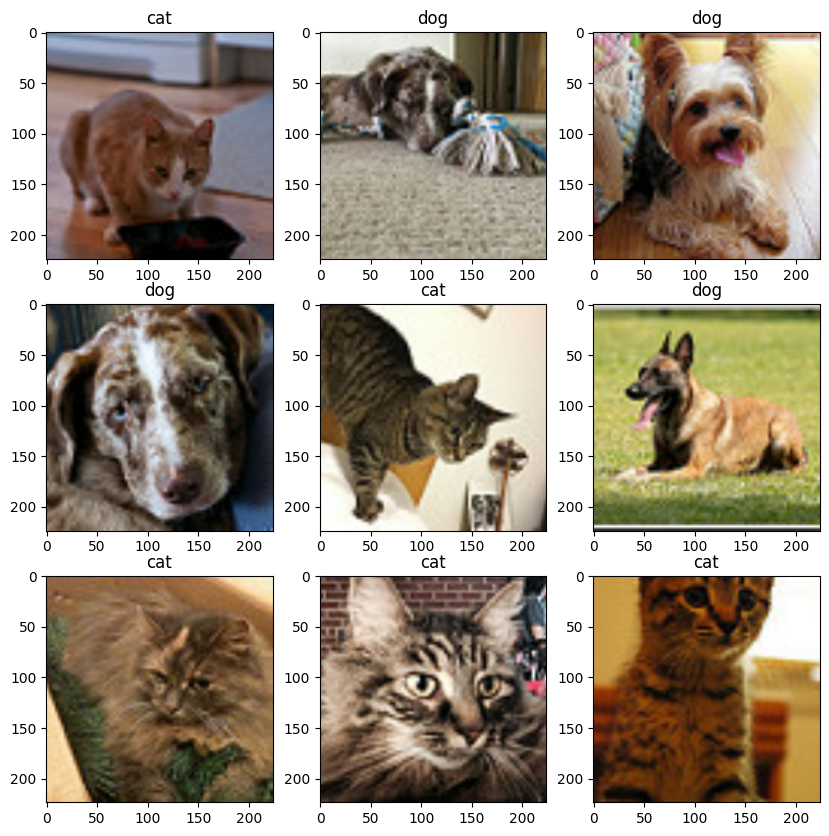

In [13]:
# 訓練データの一部を表示して確認
plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().astype("uint8")[0]])

In [14]:
# MobileNetV2モデルを作成する
input_layer = tf.keras.Input(shape=(224, 224, 3))   # 入力層
l_layer = tf.keras.applications.mobilenet_v2.preprocess_input(input_layer)   # 前処理（正規化）をする層

base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    input_tensor=l_layer,
    include_top=False,
    weights="imagenet",
    pooling='avg'
)
base_model.trainable = False

In [16]:
# Dense層を追加する
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

In [17]:
# base_modelに先ほどのDense層を追加したモデルを作成する
model = tf.keras.Sequential([
    base_model,
    output_layer
])

In [19]:
# modelをcompileする
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=["accuracy"])

In [20]:
# modelに学習させる
model.fit(train_dataset, epochs=20)

Epoch 1/20


60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 539ms/step - accuracy: 0.8050 - loss: 0.4205
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 30s 479ms/step - accuracy: 0.9144 - loss: 0.2322
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 31s 495ms/step - accuracy: 0.9422 - loss: 0.1747
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 537ms/step - accuracy: 0.9572 - loss: 0.1418
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 30s 484ms/step - accuracy: 0.9656 - loss: 0.1195
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 30s 479ms/step - accuracy: 0.9722 - loss: 0.1036
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 32s 516ms/step - accuracy: 0.9767 - loss: 0.0905
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 32s 516ms/step - accuracy: 0.9828 - loss: 0.0811
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 32s 509ms/step - accuracy: 0.9839 - loss: 0.0737
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 31s 494ms/step - accuracy: 0.9883 - loss: 0.0657
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 31s 510ms/step - accuracy: 0.9900 - loss: 0.0595
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 522ms/ste

In [21]:
# テストデータで分類を実行する
pred_data = model.predict(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step  


In [22]:
# 分類した結果を確認する
pred_data

array([[4.5836936e-05],
       [3.6132475e-04],
       [2.7063596e-05],
       [1.5707503e-03],
       [8.4209320e-04],
       [4.4087722e-04],
       [5.0952309e-04],
       [2.2487517e-04],
       [1.2584470e-05],
       [2.8773470e-04],
       [2.6167370e-05],
       [3.3269988e-03],
       [2.6233019e-03],
       [1.9443050e-04],
       [8.3105544e-05],
       [3.6122174e-06],
       [8.7859778e-05],
       [3.1956928e-04],
       [2.0499045e-03],
       [2.3743720e-03],
       [3.9185663e-03],
       [8.5871667e-02],
       [2.9298814e-03],
       [4.2874919e-04],
       [2.6716122e-01],
       [1.0592449e-03],
       [7.4077951e-04],
       [7.4367743e-04],
       [7.2611179e-03],
       [1.4606828e-04],
       [5.1918236e-04],
       [8.6911136e-01],
       [1.8761666e-04],
       [9.9235540e-04],
       [2.6649465e-03],
       [9.2707628e-01],
       [1.9552296e-03],
       [1.2749358e-03],
       [1.7674506e-02],
       [2.9202664e-04],
       [2.8695117e-04],
       [4.620084

In [23]:
# evaluate()でモデルの性能を評価する
model.evaluate(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 428ms/step - accuracy: 0.9600 - loss: 0.0800


[0.08002662658691406, 0.9599999785423279]